In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94059b273a81e0f90fbc80eb791ed50f


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count+= 1
        record_count=1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count+=1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kaitong
Processing Record 4 of Set 1 | port said
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | riyadh
Processing Record 13 of Set 1 | ndele
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | nouadhibou
Processing Reco

City not found. Skipping...
Processing Record 40 of Set 4 | hede
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | ngunguru
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | panji
Processing Record 45 of Set 4 | pilar
Processing Record 46 of Set 4 | kushima
Processing Record 47 of Set 4 | sandakan
Processing Record 48 of Set 4 | tabarqah
City not found. Skipping...
Processing Record 49 of Set 4 | pachino
Processing Record 50 of Set 4 | bargal
City not found. Skipping...
Processing Record 1 of Set 5 | jacksonville
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | troitskiy
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | doka
Processing Record 11 of Set 5 | port-cartier

Processing Record 26 of Set 8 | plettenberg bay
Processing Record 27 of Set 8 | barcelona
Processing Record 28 of Set 8 | belaya gora
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | lyubeshiv
City not found. Skipping...
Processing Record 32 of Set 8 | obuasi
Processing Record 33 of Set 8 | mandapam
Processing Record 34 of Set 8 | dolores
Processing Record 35 of Set 8 | neuquen
Processing Record 36 of Set 8 | le port
Processing Record 37 of Set 8 | molde
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | tingrela
City not found. Skipping...
Processing Record 40 of Set 8 | matale
Processing Record 41 of Set 8 | vilaka
Processing Record 42 of Set 8 | abu samrah
Processing Record 43 of Set 8 | camacha
Processing Record 44 of Set 8 | umm lajj
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | tiznit
Processing Record 47 of Set 8 | kaitangata
Processing Record 48 of Set 8 | nioro
Pro

Processing Record 13 of Set 12 | huarmey
Processing Record 14 of Set 12 | shahrud
Processing Record 15 of Set 12 | otjiwarongo
Processing Record 16 of Set 12 | obanazawa
Processing Record 17 of Set 12 | manzhouli
Processing Record 18 of Set 12 | mamlyutka
Processing Record 19 of Set 12 | tete
Processing Record 20 of Set 12 | shakawe
Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | itoman
Processing Record 23 of Set 12 | krasnyy chikoy
Processing Record 24 of Set 12 | hamadan
Processing Record 25 of Set 12 | kangaatsiaq
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | akureyri
Processing Record 29 of Set 12 | longlac
City not found. Skipping...
Processing Record 30 of Set 12 | boromo
Processing Record 31 of Set 12 | kambar
Processing Record 32 of Set 12 | kintampo
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | seryshevo
Processing Record 35 of Set 12 | saint-au

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,30.92,81,100,10.13,CA,2021-10-10 20:18:07
1,Ushuaia,-54.8000,-68.3000,51.46,35,40,24.16,AR,2021-10-10 20:18:08
2,Kaitong,44.8135,123.1500,42.01,51,0,7.99,CN,2021-10-10 20:18:10
3,Port Said,31.2565,32.2841,77.40,69,0,13.67,EG,2021-10-10 20:18:10
4,Sao Filipe,14.8961,-24.4956,81.39,70,0,5.61,CV,2021-10-10 20:18:12
5,Rikitea,-23.1203,-134.9692,74.64,81,95,18.81,PF,2021-10-10 20:18:13
6,Carnarvon,-24.8667,113.6333,62.67,82,0,14.97,AU,2021-10-10 20:18:14
7,Albany,42.6001,-73.9662,67.17,77,97,1.01,US,2021-10-10 20:18:15
8,Lebu,-37.6167,-73.6500,55.54,72,17,10.78,CL,2021-10-10 20:18:16
9,Avarua,-21.2078,-159.7750,77.05,73,100,9.22,CK,2021-10-10 20:18:18


In [9]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-10-10 20:18:07,68.2191,-135.0107,30.92,81,100,10.13
1,Ushuaia,AR,2021-10-10 20:18:08,-54.8000,-68.3000,51.46,35,40,24.16
2,Kaitong,CN,2021-10-10 20:18:10,44.8135,123.1500,42.01,51,0,7.99
3,Port Said,EG,2021-10-10 20:18:10,31.2565,32.2841,77.40,69,0,13.67
4,Sao Filipe,CV,2021-10-10 20:18:12,14.8961,-24.4956,81.39,70,0,5.61
5,Rikitea,PF,2021-10-10 20:18:13,-23.1203,-134.9692,74.64,81,95,18.81
6,Carnarvon,AU,2021-10-10 20:18:14,-24.8667,113.6333,62.67,82,0,14.97
7,Albany,US,2021-10-10 20:18:15,42.6001,-73.9662,67.17,77,97,1.01
8,Lebu,CL,2021-10-10 20:18:16,-37.6167,-73.6500,55.54,72,17,10.78
9,Avarua,CK,2021-10-10 20:18:18,-21.2078,-159.7750,77.05,73,100,9.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

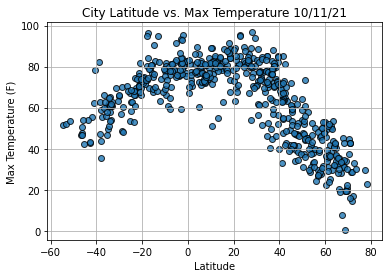

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

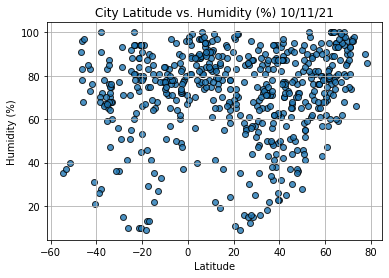

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

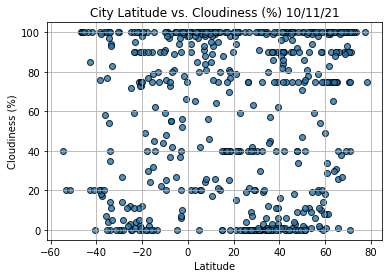

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

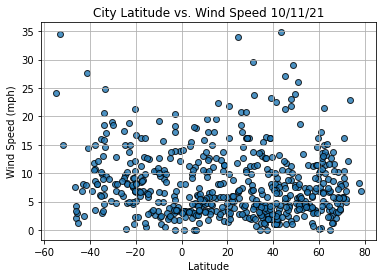

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
